In [1]:
#  Import Libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customers = pd.read_csv('/content/Customers.csv')
transactions = pd.read_csv('/content/Transactions.csv')




In [3]:
data = pd.merge(transactions, customers, on='CustomerID', how='left')



In [4]:
# Feature Engineering - Aggregated Customer Features
customer_features = data.groupby('CustomerID').agg({
    'TotalValue': 'sum',  # Total transaction value
    'TransactionID': 'count',  # Transaction count
    'Quantity': 'sum',  # Total quantity purchased
}).rename(columns={
    'TotalValue': 'TotalRevenue',
    'TransactionID': 'TransactionCount',
    'Quantity': 'TotalQuantity'
}).reset_index()

In [5]:
#  Standardize Data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features.iloc[:, 1:])
scaled_customer_features = pd.DataFrame(scaled_features, columns=customer_features.columns[1:], index=customer_features['CustomerID'])




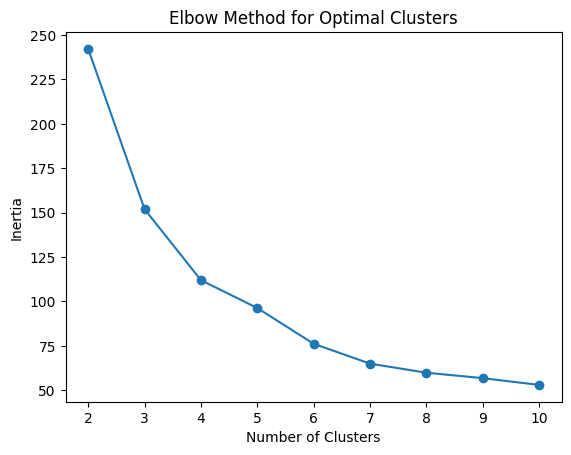

In [6]:
#  Determine Optimal Number of Clusters using Elbow Method
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_customer_features)
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()



In [7]:
#  Apply K-Means Clustering
optimal_clusters = 4  # Choose based on elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
customer_features['Cluster'] = kmeans.fit_predict(scaled_customer_features)



In [8]:
#  Calculate Davies-Bouldin Index (DBI)
db_index = davies_bouldin_score(scaled_customer_features, customer_features['Cluster'])
print(f'Davies-Bouldin Index (DBI): {db_index}')



Davies-Bouldin Index (DBI): 0.8650620583623065


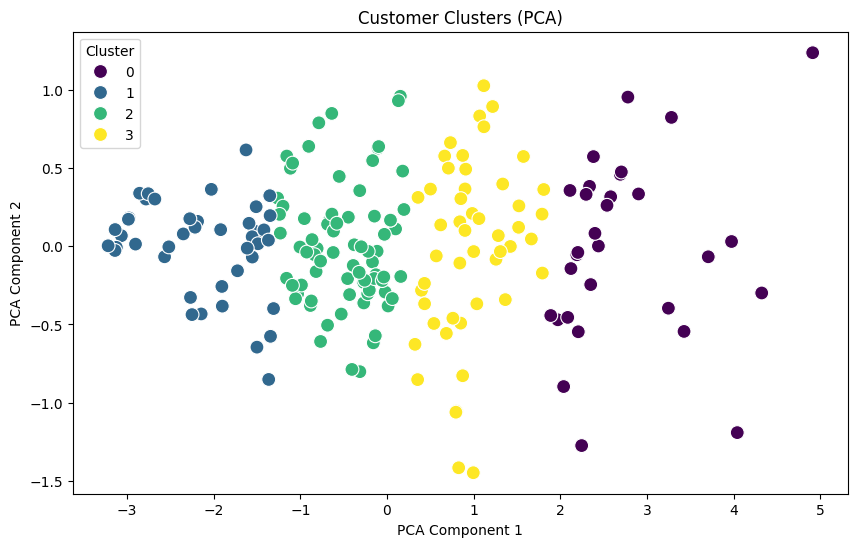

In [9]:
#  Visualize Clusters using PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_customer_features)
customer_features['PCA1'] = pca_features[:, 0]
customer_features['PCA2'] = pca_features[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PCA1', y='PCA2', hue='Cluster', data=customer_features, palette='viridis', s=100
)
plt.title('Customer Clusters (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()